In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
# ------------------------------------------------------------------
# 1. Load the results ------------------------------------------------
# ------------------------------------------------------------------
results_dir  = "particle count"
pickle_file  = "/nfs/home/colinn/Report_AC/Report_TIM/TIM_rho_results_20250515_144309/aggregated_results.pkl"

with open(pickle_file, "rb") as f:
    delta_results = pickle.load(f)

In [9]:
delta_results[1].keys()

dict_keys(['inventory_runs', 'trade_runs', 'obj_vals', 'solve_times', 'tail_probs'])

Text(0, 0.5, 'Inventory (×10³)')

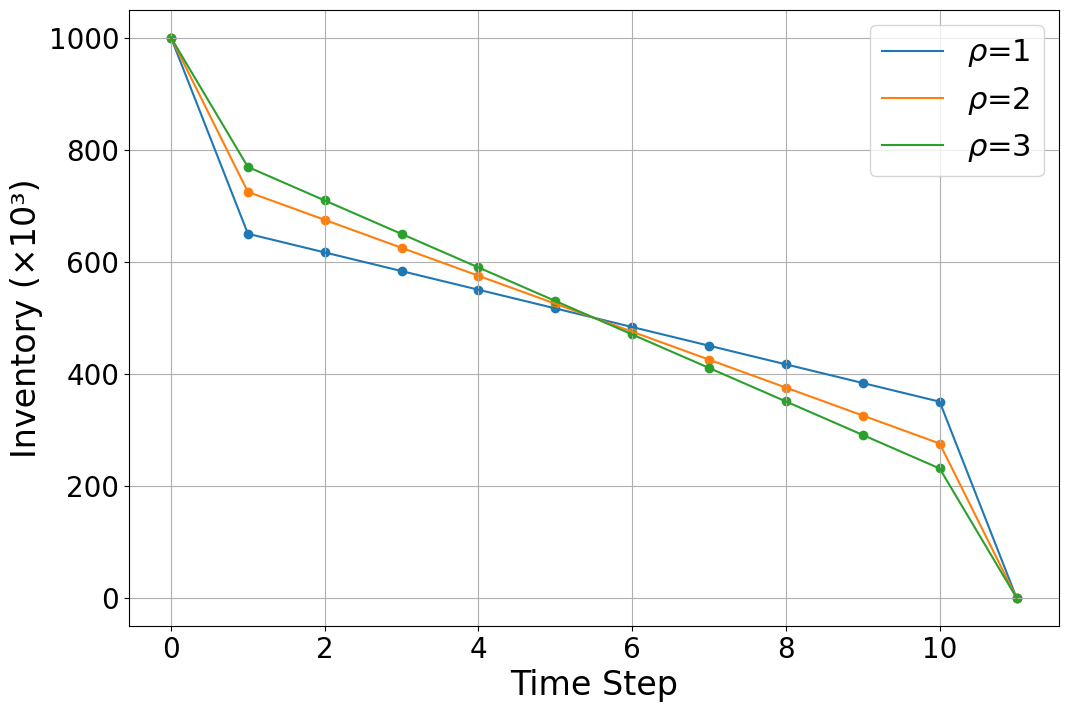

In [20]:
plt.figure(figsize=(12, 8))
time_steps = range(12)
n=24
for i in delta_results.keys():
    if i != 'Point Estimate':
        traj = delta_results[i]['inventory_runs']
        traj = np.array(traj)
        mean_traj= traj.mean(axis=0)
        # upper_bound = mean_traj + std_traj
        # lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        plt.plot(time_steps, mean_traj, label=fr'$\rho$={i}')
        #plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)

plt.xlabel('Time Step', fontsize = n)
plt.ylabel('Trade Size', fontsize = n)
plt.legend(loc = "best", fontsize = n-2)
plt.tick_params(axis="both", which="major", labelsize=n-4)
plt.grid(True)
ax = plt.gca()
ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
ax.set_ylabel("Inventory (×10³)", fontsize=n)
#plt.savefig('log_prior.pdf', bbox_inches = 'tight', pad_inches=0.05)
